<a href="https://colab.research.google.com/github/v-3sg/airline_safety/blob/main/airline_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import and Load Data**

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
#load and confirm data loading
df = pd.read_csv ('airline-safety.txt', sep=',')
df

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [8]:
#check for duplicates
df.duplicated().any()

False

In [9]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [10]:
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [11]:
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

**Clean the Data**

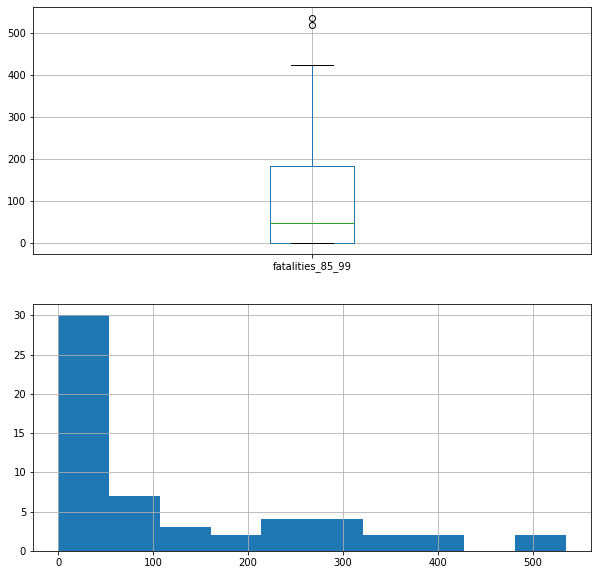

In [12]:
#use histogram/boxplot to visualize numerical data values

plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'fatalities_85_99')

plt.subplot(2, 1, 2)
df['fatalities_85_99'].hist();


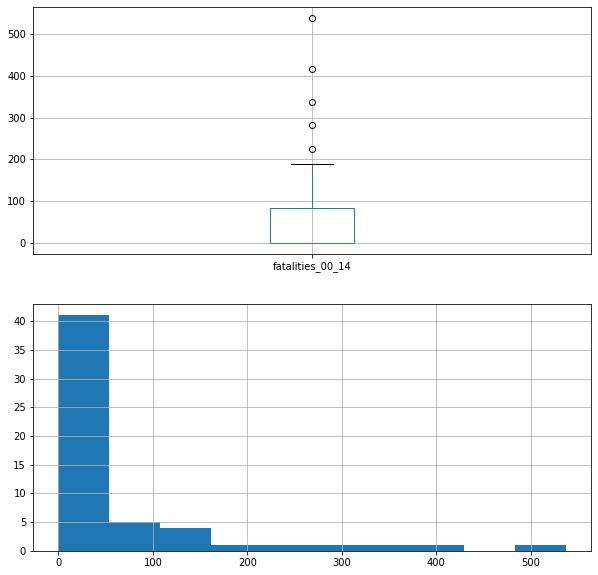

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'fatalities_00_14')

plt.subplot(2, 1, 2)
df['fatalities_00_14'].hist();

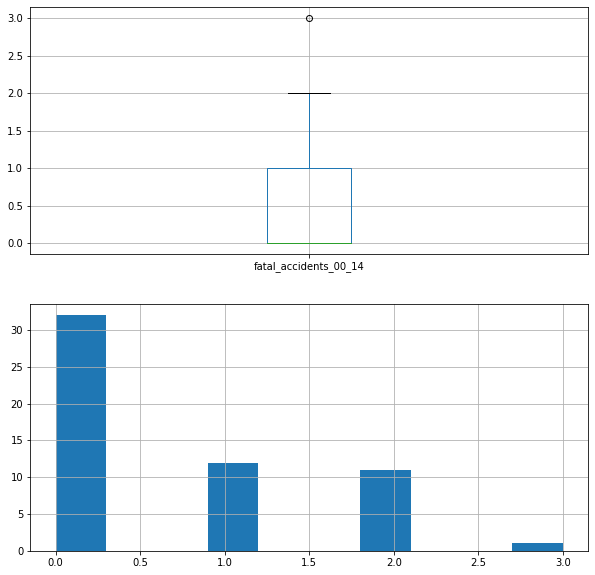

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'fatal_accidents_00_14')

plt.subplot(2, 1, 2)
df['fatal_accidents_00_14'].hist();

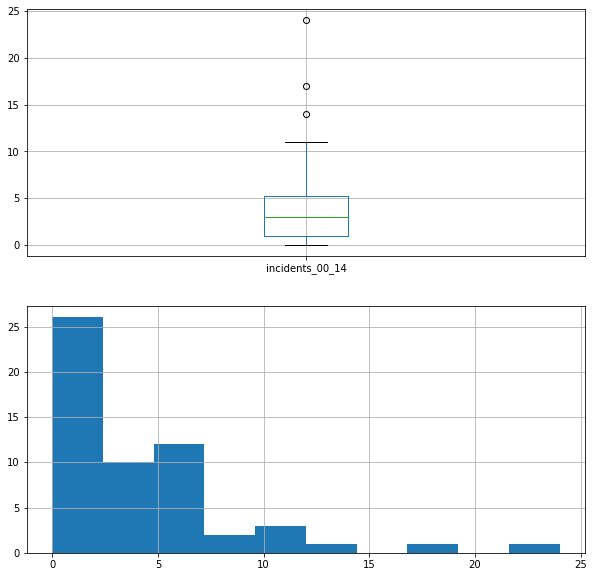

In [19]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'incidents_00_14')

plt.subplot(2, 1, 2)
df['incidents_00_14'].hist();

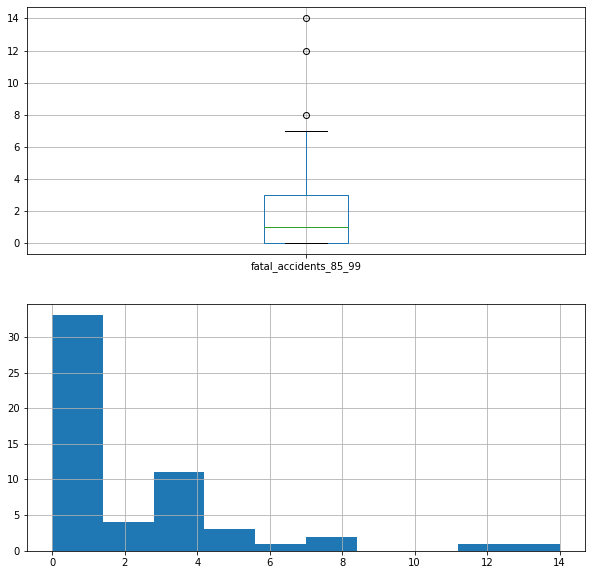

In [18]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'fatal_accidents_85_99')

plt.subplot(2, 1, 2)
df['fatal_accidents_85_99'].hist();

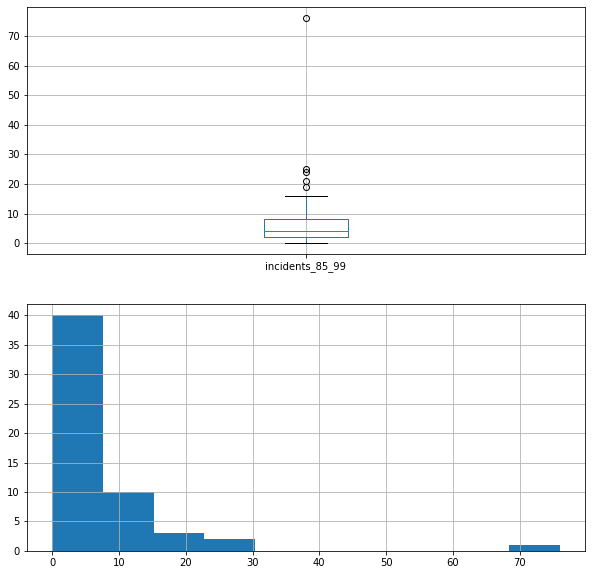

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'incidents_85_99')

plt.subplot(2, 1, 2)
df['incidents_85_99'].hist();

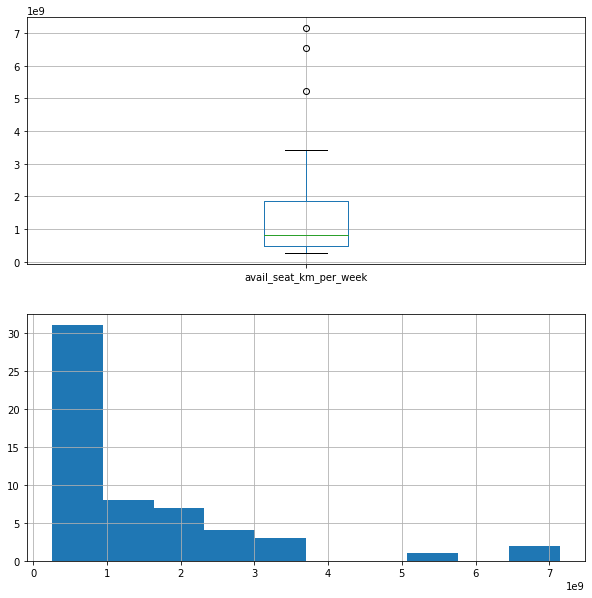

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'avail_seat_km_per_week')

plt.subplot(2, 1, 2)
df['avail_seat_km_per_week'].hist();

<Figure size 864x576 with 0 Axes>

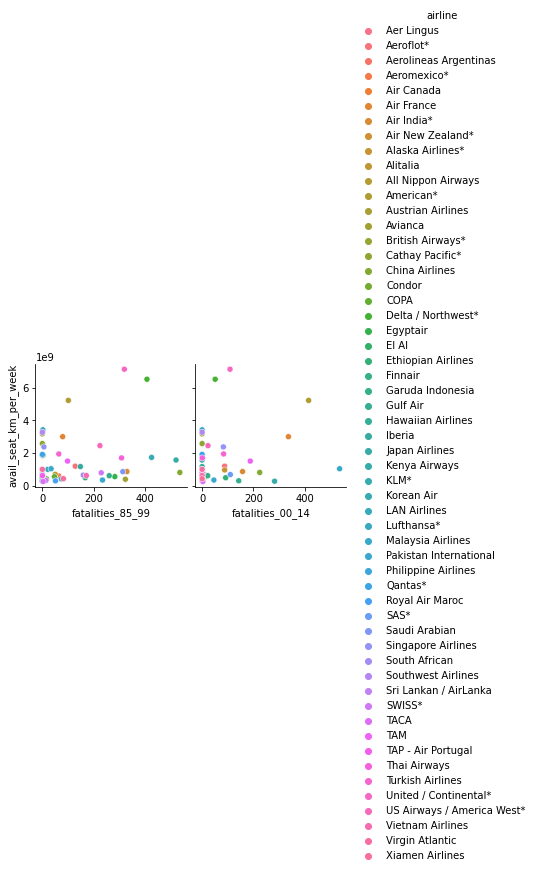

In [23]:
# This is a neat way to get a quick scatterplot between each of your features and the target 

sns.pairplot(df,
             x_vars = ['fatalities_85_99', 'fatalities_00_14'],
             y_vars = ['avail_seat_km_per_week'],
             hue = 'airline');

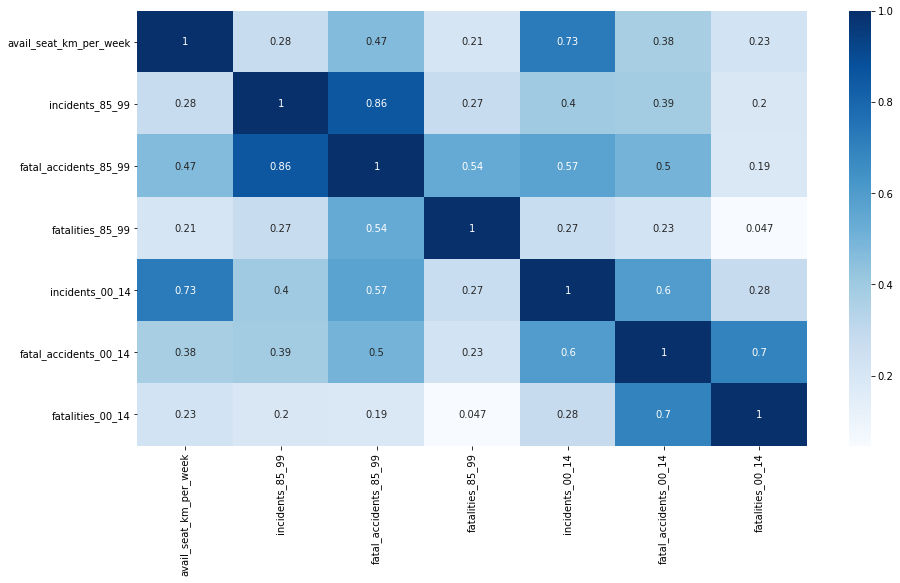

In [27]:
#oversimplified heat map
corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = 'Blues', annot = True);